# Case Study: Maximizing Profit of a Credit Card Company

Analyzing an affinity credit card (special card only available to members of a specific group). Think of it like this - the credit card company is like Citibank and the affiliated group is a company like Indian Oil or Barista. The affiliated group has to pay some fees to credit card company (because the credit card company is providing this service to the group)                                                                                                                                               

# Financial Calculations

In [1]:
# Libraries to be used in the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Consider parameters for the above problem:

* Average card balance is Rs 1000
* Each card has an interest rate of 15%
* Membership fee is Rs 20 per card
* Loss rate is 3%
* Rs 25 operating cost per card
* Rs 10 affiliation fee per card (cost to the group organization itself, so that their members get this awesome card program)
* 6.5% cost of funds (that credit card company must pay to the bank where it gets money)
* Bill/statement is issued on 1st of every month
* Credit-free period = 15 days from the bill/statement issue date.

In [2]:
# Initialization of the given parameters

total_cust=1000 # 1000 Customers
#Assuming 90% customers paid on time
cust_no_delay=95/100
# Assuming 2% paid 30 days after due date
cust_30_days=2/100 
# Assuming 2% paid 45 days after due date
cust_45_days=2/100 
# Assuming 1% paid 60 days after due date
cust_60_days=1/100

#Monthly average balance
month_bal=1000

# Source of Revenue per year
mem_fee=12*20*total_cust # membership fee is Rs 20 per card
affil_fee=12*10*total_cust # Rs 10 affiliation fee per card
int_rate=15/100 # Interest rate

# Expenses per year
cost_of_funds=12*total_cust*1000*0.065/12 # Bank lending money to the credit card company
operating_cost=12*25*1000 # Rs 25 operating cost per card
loss_rate=3/100 # 3% loss due to non-payment of credit card bills

There are two scenarios and all the following questions must be answered for both scenarios. There might be some terminology that may not be familiar to you. This is expected. We want to see if you can research and find out about them and then answer these questions.
 
For the below, two scenarios provide a monthly calculation of profits/losses 
* Scenario 1:
 i) The interest rate is simple interest.
 ii) Interest is calculated on a daily basis.
 iii) The average card balance is the average end of month balance.
 iv) All members are more than a year old.
 
 
* Scenario 2:
 i) The interest rate is compounded quarterly.
 ii) Interest is calculated on a monthly basis.
 iii) Membership grows at 5% month on month.
 iv) Card balance grows at 5% per month for each member.
 v) The average card balance is the average end of month balance.

# Calculations: Scenario 1

In [3]:
# Category Table based on default date

day=30
categories=4
category_type=[]

for cust_category in range(categories):
    if cust_category==0:
        category_type.append('Paid before due date')
    else:
        category_type.append('Paid %d days after due date'%day)
        day+=15     

Data_Calculations=pd.DataFrame({'Category':category_type},index=np.arange(1,categories+1))
Data_Calculations

,Category
1,Paid before due date
2,Paid 30 days after due date
3,Paid 45 days after due date
4,Paid 60 days after due date


Consider 1000 customers for both the scenario, divide these 1000 customers into following groups(upon your assumption and understanding about the credit lending industry)

1.customers who pay the bill within the credit-free period
2.customers paying 30 days after the last due date
3.customer paying 45 days after the last due date
4.customer paying 60 days after the last due date(remove these customers for the complete calculation of the next month,basically, you are not supposed to provide further credit services to these customers)

In [4]:
#Interest after 'N' days = N*outstanding balance*Interest rate per year/365

def interest_calc(payment_days):
    
    # Billing cycle starts from 1st of every month
    average_day_trans= 15# Assume average day of transaction as 15th of billing cycle 
    
    if payment_days==category_type[0]:
        Int_per_card=0
    #Interest for 30 days
    elif payment_days==category_type[1]:
        Int_per_card=(average_day_trans+15+30)*month_bal*int_rate/365
    #Interest for 45 days
    elif payment_days==category_type[2]:
        Int_per_card=(average_day_trans+15+45)*month_bal*int_rate/365
    #Interest for 60 days
    else:
        Int_per_card=(average_day_trans+15+60)*month_bal*int_rate/365
        
    return Int_per_card 
    
def total_int(column):
    
    payment_days=column[0]
    interest_per_card=column[1]
    
    if payment_days==category_type[0]:
        total_interest=0
    #Interest for all customers: late by 30 days
    elif payment_days==category_type[1]:
        total_interest=12*interest_per_card*cust_30_days*total_cust
    #Interest for all customers: late by 45 days
    elif payment_days==category_type[2]:
        total_interest=12*interest_per_card*cust_45_days*total_cust
   #Interest for all customers: late by 60 days, remove these customers after non payment
    else:
        total_interest=12*interest_per_card*cust_60_days*total_cust
        
    return total_interest

def PnL_check(): # Column name based on profit/loss
    if net_profit_loss>=0:
        return 'Profit margin in percentage'
    else:
        return 'Loss margin in percentage'

In [5]:
Data_Calculations['Estimated_Interest_on_Default']=Data_Calculations['Category'].apply(interest_calc).round(2)
Data_Calculations['Total_Interest_1Year']=Data_Calculations[['Category','Estimated_Interest_on_Default']].apply(total_int,axis=1)
Data_Calculations['Fixed_Late_Fee_charge']=Data_Calculations['Estimated_Interest_on_Default'].apply(lambda x: 0 if x==0 else 50)
Data_Calculations

,Category,Estimated_Interest_on_Default,Total_Interest_1Year,Fixed_Late_Fee_charge
1,Paid before due date,0.00,0.0,0
2,Paid 30 days after due date,24.66,5918.4,50
3,Paid 45 days after due date,30.82,7396.8,50
4,Paid 60 days after due date,36.99,4438.8,50


# Profit Generated: Scenario 1

In [6]:
Expenses=cost_of_funds+operating_cost+(loss_rate*total_cust*month_bal)
Earnings=mem_fee+affil_fee+np.sum(Data_Calculations['Total_Interest_1Year'])+(12*max(Data_Calculations['Fixed_Late_Fee_charge'])*5/100*total_cust)

margin=Earnings-Expenses # margin earned above or below total amount spent
net_profit_loss=margin/Expenses*100
    
report=pd.DataFrame({'Total yearly card balance':12*month_bal*total_cust,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])
report

,Total yearly card balance,Earnings,Expenses,Margin,Profit margin in percentage
,12000000,407754.0,395000.0,12754.0,3.23


# Calculations: Scenario 2

In [7]:
# Return new membership fee for each month

def membership_calc(mem_fee,monthly_growth):
    
    monthly_mem_fee=[]
    
    for months in total_months:
        monthly_mem_fee.append(mem_fee)
        new_mem_fee=mem_fee+mem_fee*(monthly_growth)
        mem_fee=new_mem_fee
        
    return monthly_mem_fee

# Return new balance for each month

def month_bal_calc(average_bal,monthly_growth):
    
    avg_month_bal=[]
    
    for months in total_months:
        avg_month_bal.append(average_bal)
        new_month_bal=average_bal+average_bal*(monthly_growth)
        average_bal=new_month_bal
        
    return avg_month_bal   

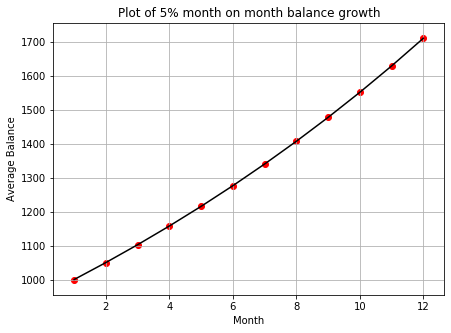

,Month,Month_on_Month_Bal,Membership_Fee
,1,1000.00,20.00
,2,1050.00,21.00
,3,1102.50,22.05
,4,1157.62,23.15
,5,1215.51,24.31
,6,1276.28,25.53
,7,1340.10,26.80
,8,1407.10,28.14
,9,1477.46,29.55
,10,1551.33,31.03


In [8]:
# Given parameters

total_months=np.arange(1,13) # Month no. 1-12
mem_fee=20 # Initial membership fee
affil_fee=10 # Affiliation fee
monthly_growth=0.05 # 5% month on month growth 
average_bal=1000 # Initial balance
monthly_growth=0.05 # 5% month on month growth 
late_fee=50

# calling the above functions

per_month_fee=membership_calc(mem_fee,monthly_growth)
bal_per_month=month_bal_calc(average_bal,monthly_growth)

plt.figure(figsize=(7,5))
plt.title('Plot of 5% month on month balance growth')
plt.plot(total_months,bal_per_month,c='black')
plt.scatter(total_months,bal_per_month,c='r')
plt.xlabel('Month',fontsize=10)
plt.ylabel('Average Balance',fontsize=10)
plt.grid()
plt.show()

Data_Calc_scenario2=pd.DataFrame({'Month':total_months,'Month_on_Month_Bal':bal_per_month,'Membership_Fee':per_month_fee},index=[' ' for index in total_months]).round(2)
Data_Calc_scenario2

**Here, Membership grows at 5% month on month and Card balance grows at 5% per month for each member.

Also, the graph shows a slight curve as the card balance increases with respect to time.

In [9]:
#Interest after 'M' months = M*[outstanding balance*(1+Interest rate per year/4)^4-outstanding balance]/12

def interest_calc(month_bal):
    # Interest Compounded quarterly and caculated monthly
    Int_per_card=(month_bal*(1+int_rate/4)**4-month_bal)/12    
    return np.round(Int_per_card,2)

# Reduce number of active accounts when customers don't pay 60 days after duedate
# Service will be discontinued 

def active_customers():
    
    active_cust=[]
    total_cust=1000 # 1000 Customers
    # Assuming 1% paid 60 days after due date
    cust_60_days=1/100

    for month in total_months:
        if month>3:
            update_customers=total_cust-cust_60_days*total_cust
            active_cust.append(int(update_customers))    
            total_cust=update_customers
        else:
            active_cust.append(int(total_cust)) 
            
    return active_cust

def int_30days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+30)/30)*cust_30_days*customers*int_month

def int_45days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+45)/30)*cust_45_days*customers*int_month

def int_60days(columns):
    
    int_month=columns[0]
    customers=columns[1]
    avg_day_trans=15 #Average day of transaction for a month
    billing_period=15 # Credit free period 
    
    return np.ceil((avg_day_trans+billing_period+60)/30)*cust_60_days*customers*int_month

def total_charge(columns):
    
    return columns[0]+columns[1]+columns[2]+columns[3]    

def PnL_check(): # Column name based on profit/loss
    if net_profit_loss>=0:
        return 'Profit margin in percentage'
    else:
        return 'Loss margin in percentage'

In [10]:
# Creating a Dataframe for scenario 2

Data_Calc_scenario2['Interest_Relative_to_Balance']=Data_Calc_scenario2['Month_on_Month_Bal'].apply(interest_calc)
Data_Calc_scenario2.insert(4,'Active_customers',active_customers(),True)
Data_Calc_scenario2['Total_Fixed_Late_Fee']=Data_Calc_scenario2['Active_customers'].apply(lambda cust: (1-cust_no_delay)*cust*late_fee)
Data_Calc_scenario2['Total_Interest_30days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_30days,axis=1)
Data_Calc_scenario2['Total_Interest_45days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_45days,axis=1)
Data_Calc_scenario2['Total_Interest_60days_late']=Data_Calc_scenario2[['Interest_Relative_to_Balance','Active_customers']].apply(int_60days,axis=1)
Data_Calc_scenario2['Total_Late_Charges_Collected']=(Data_Calc_scenario2.iloc[:,5:]).apply(total_charge,axis=1)

# Printing out the result
Data_Calc_scenario2

,Month,Month_on_Month_Bal,Membership_Fee,Interest_Relative_to_Balance,Active_customers,Total_Fixed_Late_Fee,Total_Interest_30days_late,Total_Interest_45days_late,Total_Interest_60days_late,Total_Late_Charges_Collected
,1,1000.00,20.00,13.22,1000,2500.0,528.8000,793.2000,396.6000,4218.6000
,2,1050.00,21.00,13.88,1000,2500.0,555.2000,832.8000,416.4000,4304.4000
,3,1102.50,22.05,14.58,1000,2500.0,583.2000,874.8000,437.4000,4395.4000
,4,1157.62,23.15,15.30,990,2475.0,605.8800,908.8200,454.4100,4444.1100
,5,1215.51,24.31,16.07,980,2450.0,629.9440,944.9160,472.4580,4497.3180
,6,1276.28,25.53,16.87,970,2425.0,654.5560,981.8340,490.9170,4552.3070
,7,1340.10,26.80,17.72,960,2400.0,680.4480,1020.6720,510.3360,4611.4560
,8,1407.10,28.14,18.60,950,2375.0,706.8000,1060.2000,530.1000,4672.1000
,9,1477.46,29.55,19.53,941,2352.5,735.1092,1102.6638,551.3319,4741.6049
,10,1551.33,31.03,20.51,932,2330.0,764.6128,1146.9192,573.4596,4814.9916


# Profit Generated: Scenario 2

In [11]:
# Loss rate on outstanding balance over the year

loss=0
for month_bal,total_cust in zip(Data_Calc_scenario2['Month_on_Month_Bal'],Data_Calc_scenario2['Active_customers']):
    loss=loss+(loss_rate/12)*total_cust*month_bal  

# total membership fee over the year
    
total_mem_fee=0
for mem_fee,total_cust in zip(Data_Calc_scenario2['Membership_Fee'],Data_Calc_scenario2['Active_customers']):
    total_mem_fee=total_mem_fee+mem_fee*total_cust
    
# total affiliation fee over the year 
    
total_affil_fee=0
for total_cust in Data_Calc_scenario2['Active_customers']:
    total_affil_fee=total_affil_fee+affil_fee*total_cust
    
# Total Average Balance for the financial year
    
card_bal=np.sum(Data_Calc_scenario2['Month_on_Month_Bal']*Data_Calc_scenario2['Active_customers'])
    
# Calculation of Expenses and Earnings

Expenses=cost_of_funds+operating_cost+loss
Earnings=total_mem_fee+total_affil_fee+np.sum(Data_Calc_scenario2['Total_Late_Charges_Collected'])

margin=Earnings-Expenses # margin earned above or below total amount spent
net_profit_loss=margin/Expenses*100
    
Report=pd.DataFrame({'Total yearly card balance':card_bal,'Earnings':Earnings,'Expenses':Expenses,
              'Margin':margin,PnL_check():net_profit_loss.round(2)},index=[' '])
#Printing out the results
Report

,Total yearly card balance,Earnings,Expenses,Margin,Profit margin in percentage
,15250482.62,475701.5528,403126.20655,72575.34625,18.0


# Analysis: Strategies for Better Profitability

Results:
The profit in "Scenario 1" comes out to be ~3.2% and in comparison, 
the profit in "Scenario 2" comes out to be ~18%.

Important Insights and Takeaways:

* The credit card company makes 6 times more profit if the Average balance per account increases 5% monthly in addition to 5% monthly increase in membership fee for 1 year.

* Earnings to expense ratio is: 1.032 in "Scenario 1" and 1.180 in "Scenario 2". Clearly, scenario 2 must be implemented as it can drive higher profits.

* Loss rate (loss incurred due to non payment of bills by customers) increases with increase in average card balance and as a result overall profits are also impacted.

* Interestingly, the more number of customers that defaults or pay after due date, the more profit a company generates in the form of Late fee/Interest charges. So, the company benefits from credit defaults considering 95-99% customers settle the amount.

* Interest when "compunded quarterly and calculated monthly" is higher than the interest when "calculated per day". As per the calculation, It is found that for equal outstanding balance amount and equal number of days taken after due date, there is a difference of ~7% per annum.  